In [ ]:
import pandas as pd          # for dataframes and CSV/XLSX reading
import numpy as np           # for numerical operations
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns            # for advanced visualizations
from sklearn.model_selection import train_test_split      # to split data
from sklearn.preprocessing import StandardScaler, LabelEncoder  # for preprocessing
from sklearn.ensemble import RandomForestRegressor        # example ML model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  # for evaluation

In [ ]:
df=pd.read_csv("/content/crop_yield_dataset (1).csv")

In [ ]:
df.head()


Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0  2014-01-01     Wheat     Peaty     5.50     9.440599  80.000000   
1  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
2  2014-01-01      Rice     Peaty     5.50    12.143099  80.000000   
3  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
4  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
0   10.956707  60.5  45.0  31.5    0.000000     22.833333  
1    8.591577  84.0  66.0  50.0  104.871310     66.666667  
2    7.227751  71.5  54.0  38.5    0.000000     27.333333  
3    2.682683  50.0  40.0  30.0   58.939796     35.000000  
4    7.696070  49.5  45.0  38.5   32.970413     22.166667

In [ ]:
df.shape

(36520, 12)

In [ ]:
df.describe()

Soil_pH   Temperature      Humidity    Wind_Speed             N  \
count  36520.000000  36520.000000  36520.000000  36520.000000  36520.000000   
mean       6.602731     23.813996     74.256624     10.020153     66.011035   
std        0.816973      8.920519      6.767587      2.998310     10.886721   
min        5.500000     -3.540176     45.851089     -3.388906     45.000000   
25%        6.250000     17.168542     69.745252      7.985872     58.500000   
50%        6.500000     22.902987     77.097013     10.000299     65.000000   
75%        6.750000     30.254748     80.000000     12.038546     71.500000   
max        8.000000     54.148911     80.000000     22.606078     91.000000   

                  P            K    Crop_Yield  Soil_Quality  
count  36520.000000  36520.00000  36520.000000  36520.000000  
mean      53.014006     42.01825     26.878480     37.516632  
std        8.812884      8.53781     25.740936     17.703171  
min       36.000000     27.00000      0.000000     13.291667  
25%       45.000000     35.00000      0.000000     22.500000  
50%       54.000000     42.00000     23.366344     35.583333  
75%       60.000000     49.50000     46.415729     49.291667  
max       72.000000     60.00000    136.711982     74.333333

In [ ]:
df.sample(10)

Date  Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
10035  2016-09-30     Cotton     Peaty     5.50    18.093459  80.000000   
1051   2014-04-16       Corn     Peaty     5.50    22.358515  77.641485   
19052  2019-03-21       Rice     Sandy     6.75    21.023911  78.976089   
17436  2018-10-10  Sugarcane     Loamy     6.50    15.676935  80.000000   
21316  2019-11-02  Sugarcane     Sandy     6.75    15.587436  80.000000   
28947  2021-12-04     Tomato      Clay     6.25    16.813215  80.000000   
17928  2018-11-28     Potato     Peaty     5.50    16.594871  80.000000   
31296  2022-07-27  Sugarcane    Saline     8.00    39.942101  60.057899   
15305  2018-03-11     Cotton     Peaty     5.50    24.577765  75.422235   
13279  2017-08-20  Sunflower      Clay     6.25    26.061779  73.938221   

       Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
10035   11.696070  60.5  49.5  42.0   45.424512     25.333333  
1051     5.794276  66.0  49.5  35.0   52.074818     25.083333  
19052    9.314387  65.0  48.0  33.0   44.357798     42.583333  
17436   15.242723  91.0  72.0  60.0    7.972481     74.333333  
21316    9.588376  65.0  48.0  36.0    5.075984     43.458333  
28947   13.277122  60.0  45.0  40.0   12.957527     42.291667  
17928   14.088857  60.5  45.0  31.5   36.372285     22.833333  
31296   10.898874  84.5  66.0  54.0    0.000000     17.041667  
15305   13.699207  60.5  49.5  42.0   30.431725     25.333333  
13279    4.555027  60.0  55.0  44.0   27.604242     46.375000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520 non-null  object 
 1   Crop_Type     36520 non-null  object 
 2   Soil_Type     36520 non-null  object 
 3   Soil_pH       36520 non-null  float64
 4   Temperature   36520 non-null  float64
 5   Humidity      36520 non-null  float64
 6   Wind_Speed    36520 non-null  float64
 7   N             36520 non-null  float64
 8   P             36520 non-null  float64
 9   K             36520 non-null  float64
 10  Crop_Yield    36520 non-null  float64
 11  Soil_Quality  36520 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.3+ MB


In [ ]:
df.isnull().sum()

Date            0
Crop_Type       0
Soil_Type       0
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               0
P               0
K               0
Crop_Yield      0
Soil_Quality    0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

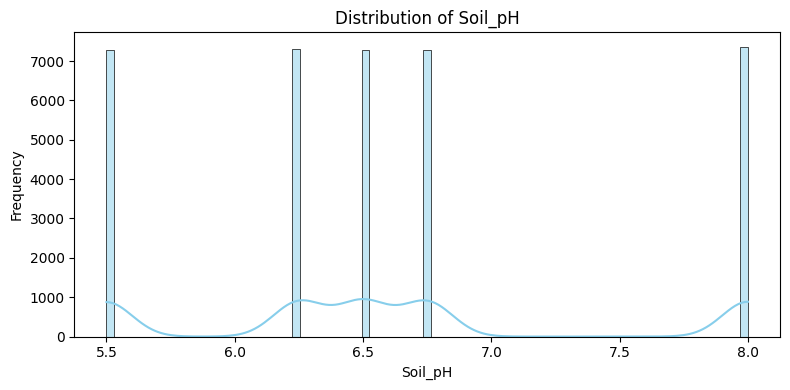

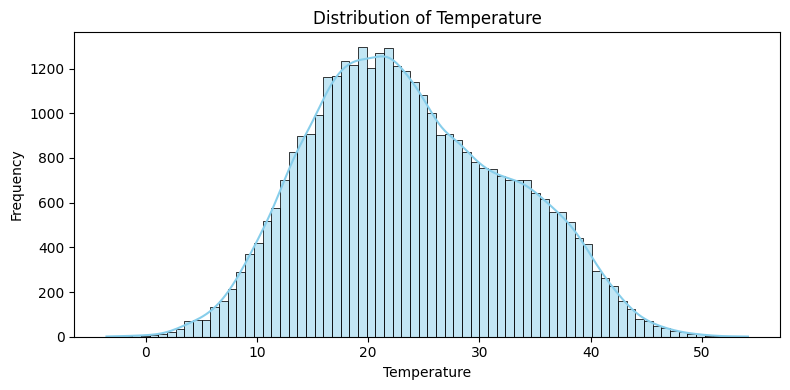

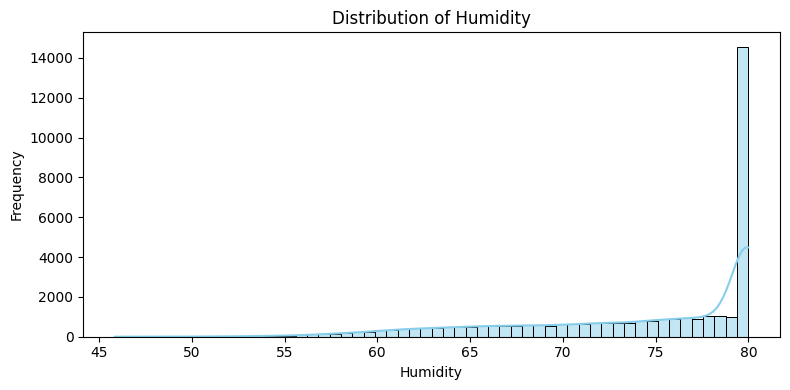

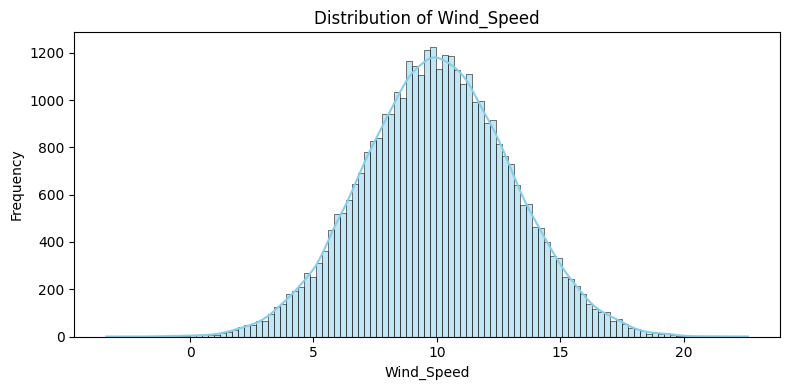

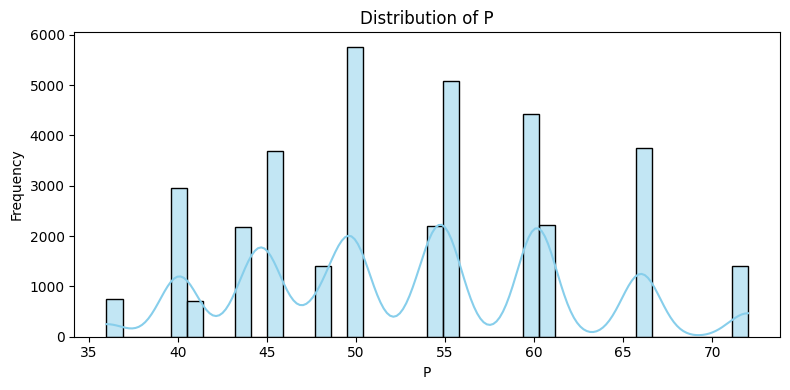

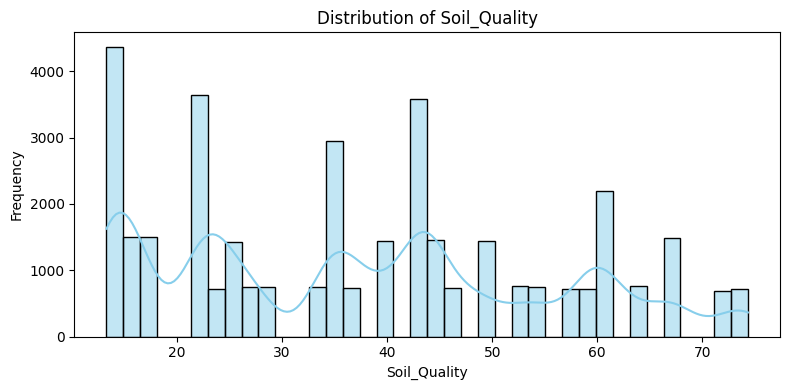

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (excluding non-numeric like Date, Crop_Type, etc.)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column and plot
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()


In [ ]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


               Soil_pH  Temperature  Humidity  Wind_Speed         N         P  \
Soil_pH       1.000000     0.009911 -0.009051    0.003033  0.248713  0.295893   
Temperature   0.009911     1.000000 -0.942212    0.002628  0.000896  0.001060   
Humidity     -0.009051    -0.942212  1.000000   -0.005196 -0.001425 -0.001529   
Wind_Speed    0.003033     0.002628 -0.005196    1.000000 -0.004657 -0.001317   
N             0.248713     0.000896 -0.001425   -0.004657  1.000000  0.892132   
P             0.295893     0.001060 -0.001529   -0.001317  0.892132  1.000000   
K             0.304062     0.002090 -0.002154   -0.001619  0.700894  0.906531   
Crop_Yield   -0.016397    -0.288140  0.511841   -0.008464  0.143744  0.166614   
Soil_Quality -0.324216    -0.006447  0.006123   -0.005836  0.356389  0.386558   

                     K  Crop_Yield  Soil_Quality  
Soil_pH       0.304062   -0.016397     -0.324216  
Temperature   0.002090   -0.288140     -0.006447  
Humidity     -0.002154    0.511841  

In [ ]:
df.columns

Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')

In [ ]:
df.drop("Date", axis=1, inplace=True)


In [ ]:
df.columns

Index(['Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Crop_Type     36520 non-null  object 
 1   Soil_Type     36520 non-null  object 
 2   Soil_pH       36520 non-null  float64
 3   Temperature   36520 non-null  float64
 4   Humidity      36520 non-null  float64
 5   Wind_Speed    36520 non-null  float64
 6   N             36520 non-null  float64
 7   P             36520 non-null  float64
 8   K             36520 non-null  float64
 9   Crop_Yield    36520 non-null  float64
 10  Soil_Quality  36520 non-null  float64
dtypes: float64(9), object(2)
memory usage: 3.1+ MB


🔍 Skewness of Numeric Features:

Crop_Yield      0.628026
Soil_pH         0.502483
N               0.333523
Soil_Quality    0.306760
Temperature     0.247135
K               0.206201
P               0.193138
Wind_Speed      0.016444
Humidity       -1.017169
dtype: float64


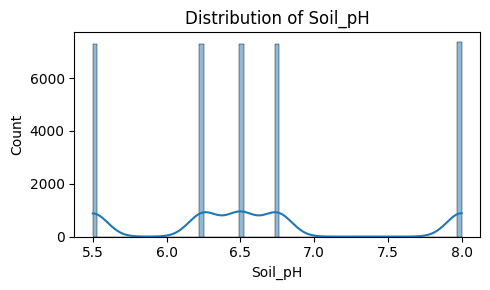

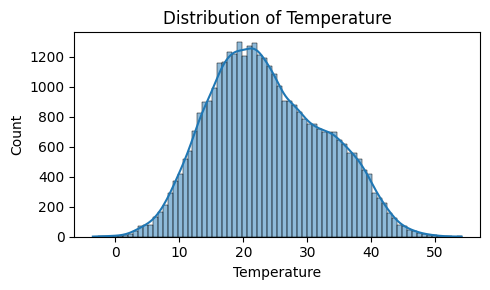

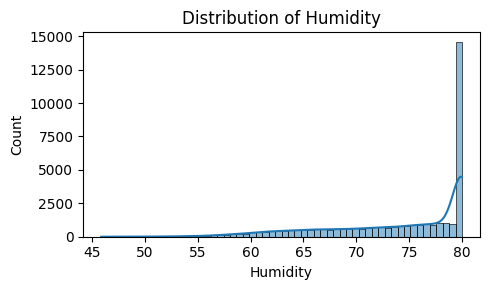

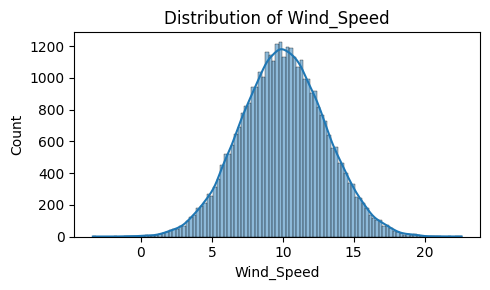

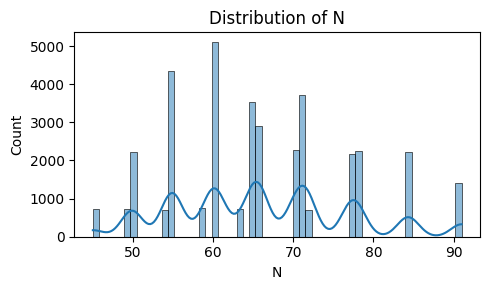

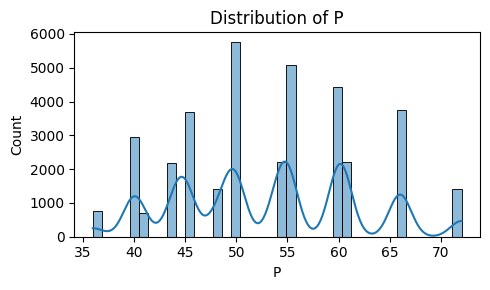

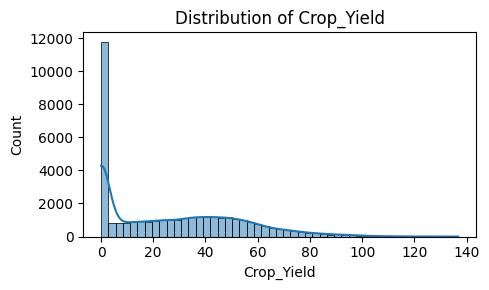

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Step 2: Print skewness
print("🔍 Skewness of Numeric Features:\n")
print(df[numeric_cols].skew().sort_values(ascending=False))

# Step 3: Plot histograms
for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


In [ ]:
df['Humidity_fixed'] = np.log(df['Humidity'].max() + 1 - df['Humidity'])


In [ ]:
from scipy.stats import skew
print(skew(df['Humidity_fixed']))


0.11635732033880788


In [ ]:
#Keep Humidity_fixed and drop the original Humidity
df.drop('Humidity', axis=1, inplace=True)
df.rename(columns={'Humidity_fixed': 'Humidity'}, inplace=True)


In [ ]:
df.columns

Index(['Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Wind_Speed', 'N',
       'P', 'K', 'Crop_Yield', 'Soil_Quality', 'Humidity'],
      dtype='object')

In [ ]:
#Now, check if any other numeric columns still have high skewness (> |0.8|):
# Step 1: Re-check skewness
numeric_cols = df.select_dtypes(include='number').columns
skew_vals = df[numeric_cols].skew().sort_values()

# Step 2: Show columns with high skew
print("Highly Skewed Features (abs > 0.8):")
print(skew_vals[abs(skew_vals) > 0.8])


Highly Skewed Features (abs > 0.8):
Series([], dtype: float64)


In [ ]:
#Feature Engineering

df_fe = df.copy()

# 1. Total Nutrients
df_fe['Total_Nutrients'] = df_fe['N'] + df_fe['P'] + df_fe['K']

# 2. NPK Ratios
df_fe['N_P_ratio'] = df_fe['N'] / (df_fe['P'] + 1)  # +1 to avoid division by zero
df_fe['P_K_ratio'] = df_fe['P'] / (df_fe['K'] + 1)

# 3. Weather Index
df_fe['Weather_Index'] = df_fe['Temperature'] * df_fe['Humidity'] / (df_fe['Wind_Speed'] + 1)

# 4. Nutrient-Soil Interaction
df_fe['N_SoilQuality'] = df_fe['N'] * df_fe['Soil_Quality']
df_fe['K_SoilpH'] = df_fe['K'] * df_fe['Soil_pH']

# 5. Soil Condition Index
df_fe['Soil_Condition'] = df_fe['Soil_Quality'] / (df_fe['Soil_pH'] + 0.1)

# Optional log features if skewness present (test these later if needed)
import numpy as np
df_fe['Log_Temp'] = np.log(df_fe['Temperature'] + 1)
df_fe['Log_Humidity'] = np.log(df_fe['Humidity'] + 1)

# Check shape
df_fe.shape


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(36520, 20)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select only numeric columns (to avoid 'Wheat' or other strings)
numeric_df = df_fe.select_dtypes(include=['number'])

# 2. Compute correlation matrix
corr_matrix = numeric_df.corr()

# 3. Sort and extract correlation with Crop_Yield
crop_corr = corr_matrix['Crop_Yield'].sort_values(ascending=False)

# 4. Print correlation values for reference
print("🔢 Correlation Scores with Crop_Yield:\n")
print(crop_corr)

# 5. Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crop_corr.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlation of Numeric Features with Crop_Yield")
plt.show()


🔢 Correlation Scores with Crop_Yield:

Crop_Yield         1.000000
N_SoilQuality      0.209144
Soil_Quality       0.197472
Soil_Condition     0.191899
P                  0.166614
Total_Nutrients    0.163970
K                  0.155379
N                  0.143744
K_SoilpH           0.102466
Wind_Speed        -0.008464
Soil_pH           -0.016397
P_K_ratio         -0.035102
N_P_ratio         -0.046786
Log_Temp          -0.127099
Weather_Index     -0.232030
Log_Humidity      -0.287508
Temperature       -0.288140
Humidity          -0.375124
Name: Crop_Yield, dtype: float64


In [ ]:

# Step 1: Select numeric columns
numeric_df = df_fe.select_dtypes(include=['number'])

# Step 2: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Set threshold
threshold = 0.10

# Step 4: Get correlation of all features with target
correlation_scores = corr_matrix['Crop_Yield'].drop('Crop_Yield')

# Step 5: Filter based on threshold
selected_features = correlation_scores[correlation_scores.abs() > threshold].index.tolist()

# Step 6: Output selected features
print("✅ Selected Features based on correlation threshold:\n")
print(selected_features)


✅ Selected Features based on correlation threshold:

['Temperature', 'N', 'P', 'K', 'Soil_Quality', 'Humidity', 'Total_Nutrients', 'Weather_Index', 'N_SoilQuality', 'K_SoilpH', 'Soil_Condition', 'Log_Temp', 'Log_Humidity']


In [ ]:
# Threshold for multicollinearity (e.g., > 0.85)
threshold = 0.85

# Get the correlation matrix
corr_matrix = df_fe[selected_features].corr().abs()

# Create a mask to ignore duplicate pairs (upper triangle matrix)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Store highly correlated feature pairs
high_corr_pairs = []

print("Highly correlated feature pairs (correlation > {:.2f}):\n".format(threshold))
for column in upper_triangle.columns:
    for row in upper_triangle.index:
        corr_value = upper_triangle.loc[row, column]
        if pd.notnull(corr_value) and corr_value > threshold:
            print(f"  🔁 {row} and {column} => Correlation: {corr_value:.2f}")
            high_corr_pairs.append((row, column, corr_value))


Highly correlated feature pairs (correlation > 0.85):

  🔁 N and P => Correlation: 0.89
  🔁 P and K => Correlation: 0.91
  🔁 Temperature and Humidity => Correlation: 0.94
  🔁 N and Total_Nutrients => Correlation: 0.93
  🔁 P and Total_Nutrients => Correlation: 0.99
  🔁 K and Total_Nutrients => Correlation: 0.91
  🔁 Soil_Quality and N_SoilQuality => Correlation: 0.96
  🔁 K and K_SoilpH => Correlation: 0.89
  🔁 Soil_Quality and Soil_Condition => Correlation: 0.99
  🔁 N_SoilQuality and Soil_Condition => Correlation: 0.94
  🔁 Temperature and Log_Temp => Correlation: 0.96
  🔁 Humidity and Log_Temp => Correlation: 0.88
  🔁 Temperature and Log_Humidity => Correlation: 0.91
  🔁 Humidity and Log_Humidity => Correlation: 0.99
  🔁 Log_Temp and Log_Humidity => Correlation: 0.87


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Step 1: Define your categorical columns
categorical_cols = ['Crop_Type', 'Soil_Type']

# Step 2: Create the ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # keep all other (numerical) columns
)

# Step 3: Fit and transform your original X dataframe
X_encoded_array = ct.fit_transform(X)

# Step 4: Convert back to a pandas DataFrame
X_encoded = pd.DataFrame(X_encoded_array, columns=ct.get_feature_names_out())

# Optional: Reset index if necessary
X_encoded.index = X.index

# Step 5: Check structure
print("\n✅ Encoded DataFrame Info:")
print(X_encoded.info())



✅ Encoded DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   encoder__Crop_Type_Corn       36520 non-null  float64
 1   encoder__Crop_Type_Cotton     36520 non-null  float64
 2   encoder__Crop_Type_Potato     36520 non-null  float64
 3   encoder__Crop_Type_Rice       36520 non-null  float64
 4   encoder__Crop_Type_Soybean    36520 non-null  float64
 5   encoder__Crop_Type_Sugarcane  36520 non-null  float64
 6   encoder__Crop_Type_Sunflower  36520 non-null  float64
 7   encoder__Crop_Type_Tomato     36520 non-null  float64
 8   encoder__Crop_Type_Wheat      36520 non-null  float64
 9   encoder__Soil_Type_Loamy      36520 non-null  float64
 10  encoder__Soil_Type_Peaty      36520 non-null  float64
 11  encoder__Soil_Type_Saline     36520 non-null  float64
 12  encoder__Soil_Type_Sandy      365

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 🧾 Define your original feature matrix (make sure X is defined before this)
# For example:
# X = df.drop('Crop_Yield', axis=1)   # if Crop_Yield is your target

# ✅ Step 1: Define categorical columns
categorical_cols = ['Crop_Type', 'Soil_Type']

# ✅ Step 2: Create ColumnTransformer with OneHotEncoder
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as they are
)

# ✅ Step 3: Fit and transform the data
X_encoded_array = ct.fit_transform(X)

# ✅ Step 4: Convert the output array back to a DataFrame with column names
X_encoded = pd.DataFrame(X_encoded_array, columns=ct.get_feature_names_out())

# ✅ Step 5: Reset index (optional, but useful to match original DataFrame)
X_encoded.index = X.index

# ✅ Step 6: View structure
print("\n✅ Encoded DataFrame Info:")
print(X_encoded.info())

# Optional: View first few rows
print("\n🔍 Preview of Encoded DataFrame:")
print(X_encoded.head())



✅ Encoded DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   encoder__Crop_Type_Corn       36520 non-null  float64
 1   encoder__Crop_Type_Cotton     36520 non-null  float64
 2   encoder__Crop_Type_Potato     36520 non-null  float64
 3   encoder__Crop_Type_Rice       36520 non-null  float64
 4   encoder__Crop_Type_Soybean    36520 non-null  float64
 5   encoder__Crop_Type_Sugarcane  36520 non-null  float64
 6   encoder__Crop_Type_Sunflower  36520 non-null  float64
 7   encoder__Crop_Type_Tomato     36520 non-null  float64
 8   encoder__Crop_Type_Wheat      36520 non-null  float64
 9   encoder__Soil_Type_Loamy      36520 non-null  float64
 10  encoder__Soil_Type_Peaty      36520 non-null  float64
 11  encoder__Soil_Type_Saline     36520 non-null  float64
 12  encoder__Soil_Type_Sandy      365

In [ ]:
X_encoded.shape  # should return (36520, 21)


(36520, 21)

In [ ]:
df.sample(10)

Crop_Type Soil_Type  Soil_pH  Temperature  Wind_Speed     N     P     K  \
26573    Barley     Loamy     6.50    20.365076   13.843542  70.0  60.0  50.0   
34383    Barley     Sandy     6.75    32.821047    9.712894  50.0  40.0  30.0   
29540     Wheat     Sandy     6.75    22.290144   11.069650  55.0  40.0  27.0   
19705    Cotton     Loamy     6.50    26.128957    4.591801  77.0  66.0  60.0   
6285     Cotton     Sandy     6.75    17.704420   11.739803  55.0  44.0  36.0   
1750      Wheat      Clay     6.25    41.951277   15.362039  66.0  50.0  36.0   
2431       Corn     Sandy     6.75     9.991299    7.285586  60.0  44.0  30.0   
3680      Wheat     Peaty     5.50    14.092629   13.233212  60.5  45.0  31.5   
33793    Barley      Clay     6.25    19.381519   10.252189  60.0  50.0  40.0   
33697    Tomato      Clay     6.25    27.185656    9.533341  60.0  45.0  40.0   

       Crop_Yield  Soil_Quality  Humidity  
26573   93.916345     60.000000  0.311210  
34383    0.000000     35.000000  2.626193  
29540   45.922914     35.583333  1.190931  
19705   34.643601     67.666667  1.964165  
6285    55.785360     39.375000  0.000000  
1750     0.000000     44.333333  3.133374  
2431     0.000000     39.083333  0.000000  
3680    23.848759     22.833333  0.000000  
33793   65.431125     43.750000  0.000000  
33697   53.831216     42.291667  2.102383

In [ ]:
# Count how many rows have Humidity == 0
zero_humidity_count = df[df['Humidity'] == 0].shape[0]

print(f"Number of rows with Humidity = 0: {zero_humidity_count}")


Number of rows with Humidity = 0: 13615


🔍 Humidity Value Summary:
count    36520.000000
mean         1.292655
std          1.174419
min          0.000000
25%          0.000000
50%          1.361742
75%          2.420790
max          3.559594
Name: Humidity_original, dtype: float64

⚠️ Number of Humidity values < 1.0:
16364


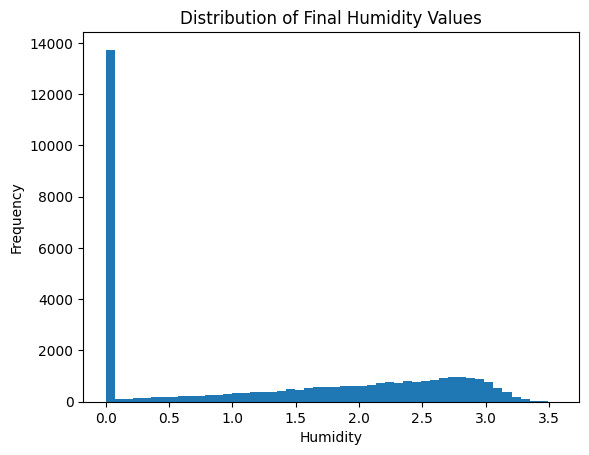

In [ ]:
# Check if the Humidity was changed too much
df_compare = df.copy()
df_compare['Humidity_original'] = df_compare['Humidity']  # This is your "fixed" column now

# Load original data (if possible)
# original_df = pd.read_csv('your_original_file.csv')
# df_compare['Humidity_true'] = original_df['Humidity']

# For now, simulate this manually
print("🔍 Humidity Value Summary:")
print(df_compare['Humidity_original'].describe())

# See how many very low values exist
print("\n⚠️ Number of Humidity values < 1.0:")
print((df_compare['Humidity_original'] < 1.0).sum())

# Optionally plot histogram
import matplotlib.pyplot as plt
plt.hist(df_compare['Humidity_original'], bins=50)
plt.title("Distribution of Final Humidity Values")
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Always load the data first to make sure 'df' exists
df = pd.read_csv("/content/crop_yield_dataset (1).csv")

# Replace 0 in 'Humidity' with np.nan
df['Humidity'] = df['Humidity'].replace(0, np.nan)

# Select relevant features for KNN imputation
features = ['Humidity', 'Soil_Quality', 'Temperature', 'Soil_pH', 'P', 'K', 'N']
imputer = KNNImputer(n_neighbors=5)
df[features] = imputer.fit_transform(df[features])


In [ ]:
print(df.columns)


Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Load the dataset
df = pd.read_csv("/content/crop_yield_dataset (1).csv")

# Replace 0 in 'Humidity' with NaN
df['Humidity'] = df['Humidity'].replace(0, np.nan)

# Apply KNN Imputation
knn_features = ['Humidity', 'Soil_Quality', 'Temperature', 'Soil_pH', 'P', 'K', 'N']
imputer = KNNImputer(n_neighbors=5)
df[knn_features] = imputer.fit_transform(df[knn_features])

# Drop 'Date' if it's not needed
df = df.drop(columns=['Date'])

# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=['Crop_Type', 'Soil_Type'], drop_first=True)

# Now your df is ready for scaling and regression
print(df.head())


   Soil_pH  Temperature   Humidity  Wind_Speed     N     P     K  Crop_Yield  \
0     5.50     9.440599  80.000000   10.956707  60.5  45.0  31.5    0.000000   
1     6.50    20.052576  79.947424    8.591577  84.0  66.0  50.0  104.871310   
2     5.50    12.143099  80.000000    7.227751  71.5  54.0  38.5    0.000000   
3     6.75    19.751848  80.000000    2.682683  50.0  40.0  30.0   58.939796   
4     5.50    16.110395  80.000000    7.696070  49.5  45.0  38.5   32.970413   

   Soil_Quality  Crop_Type_Corn  ...  Crop_Type_Rice  Crop_Type_Soybean  \
0     22.833333           False  ...           False              False   
1     66.666667            True  ...           False              False   
2     27.333333           False  ...            True              False   
3     35.000000           False  ...           False              False   
4     22.166667           False  ...           False               True   

   Crop_Type_Sugarcane  Crop_Type_Sunflower  Crop_Type_Tomato  \
0  

In [ ]:
#Replace 0s in 'Humidity' with NaN (Missing Values)
df['Humidity'] = df['Humidity'].replace(0, np.nan)


In [ ]:
#KNN Imputation on Numerical Features
features_to_impute = ['Humidity', 'Soil_Quality', 'Temperature', 'Soil_pH', 'P', 'K', 'N']

imputer = KNNImputer(n_neighbors=5)
df[features_to_impute] = imputer.fit_transform(df[features_to_impute])



In [ ]:
# Check for remaining missing values
print(df.isnull().sum())

# Optional: quick stats check
print(df.describe())


Soil_pH                0
Temperature            0
Humidity               0
Wind_Speed             0
N                      0
P                      0
K                      0
Crop_Yield             0
Soil_Quality           0
Crop_Type_Corn         0
Crop_Type_Cotton       0
Crop_Type_Potato       0
Crop_Type_Rice         0
Crop_Type_Soybean      0
Crop_Type_Sugarcane    0
Crop_Type_Sunflower    0
Crop_Type_Tomato       0
Crop_Type_Wheat        0
Soil_Type_Loamy        0
Soil_Type_Peaty        0
Soil_Type_Saline       0
Soil_Type_Sandy        0
dtype: int64
            Soil_pH   Temperature      Humidity    Wind_Speed             N  \
count  36520.000000  36520.000000  36520.000000  36520.000000  36520.000000   
mean       6.602731     23.813996     74.256624     10.020153     66.011035   
std        0.816973      8.920519      6.767587      2.998310     10.886721   
min        5.500000     -3.540176     45.851089     -3.388906     45.000000   
25%        6.250000     17.168542     69.7

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# #sperate input vs output feature
X = df.drop('Crop_Yield', axis=1)
y = df['Crop_Yield']


In [ ]:
#Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


NameError: name 'your_feature_names' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression Results:
R² Score: 0.6469557691266542
MSE: 235.4197575197844


In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R²:", ridge.score(X_test, y_test))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso R²:", lasso.score(X_test, y_test))


Ridge R²: 0.6469601450095936
Lasso R²: 0.6465617818761562


Initial Data Exploration:
Shape: (36520, 12)

Missing values:
Date            0
Crop_Type       0
Soil_Type       0
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               0
P               0
K               0
Crop_Yield      0
Soil_Quality    0
dtype: int64

Data types:
Date             object
Crop_Type        object
Soil_Type        object
Soil_pH         float64
Temperature     float64
Humidity        float64
Wind_Speed      float64
N               float64
P               float64
K               float64
Crop_Yield      float64
Soil_Quality    float64
dtype: object

Feature Engineering...


<Figure size 1500x1000 with 0 Axes>

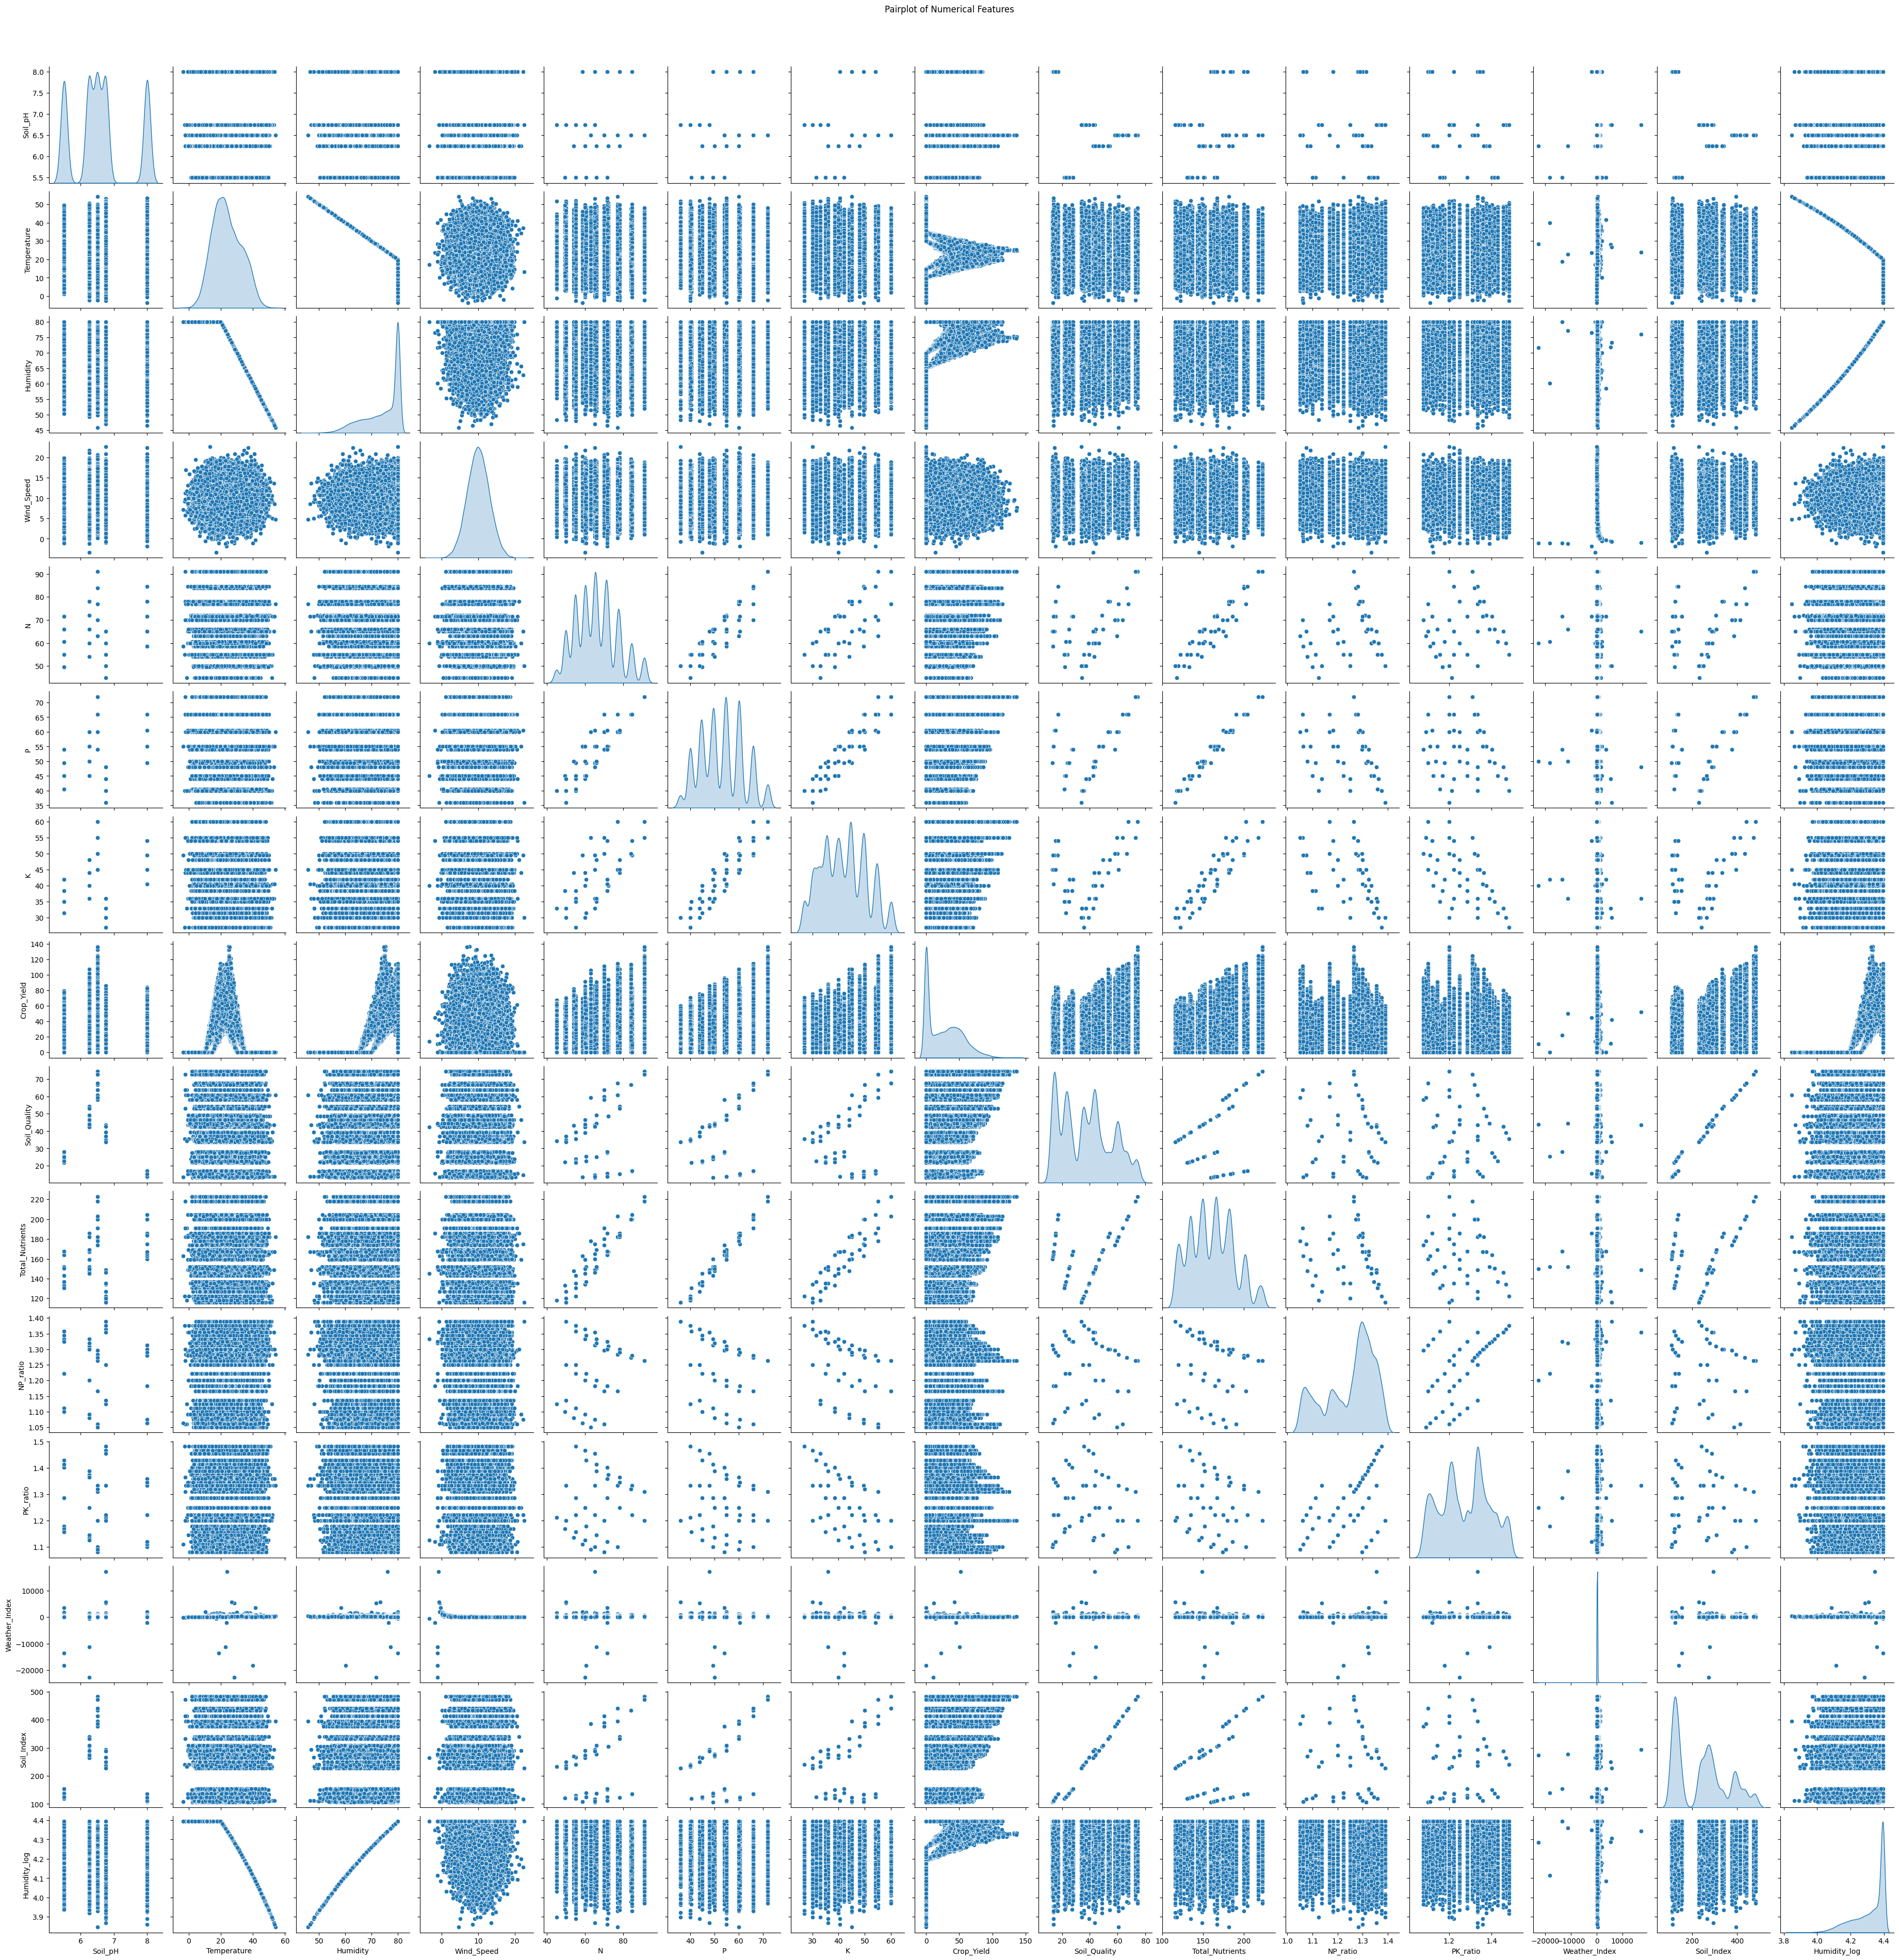

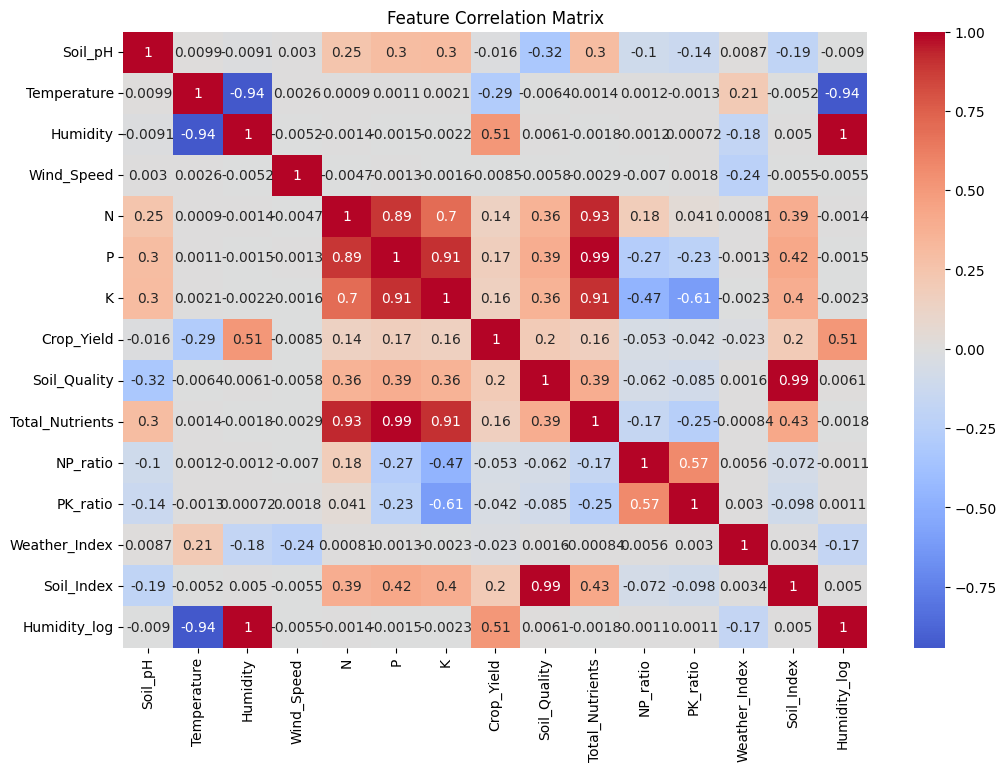


Training RandomForest...
RandomForest Results:
R² Score: 0.9748
MSE: 16.8023
Cross-validated R²: 0.9758 (±0.0010)

Training XGBoost...
XGBoost Results:
R² Score: 0.9757
MSE: 16.2130
Cross-validated R²: 0.9758 (±0.0008)

Training ElasticNet...
ElasticNet Results:
R² Score: 0.3223
MSE: 451.8942
Cross-validated R²: 0.3214 (±0.0054)

Training GradientBoosting...
GradientBoosting Results:
R² Score: 0.9242
MSE: 50.5271
Cross-validated R²: 0.9248 (±0.0025)

Feature Importance Analysis...


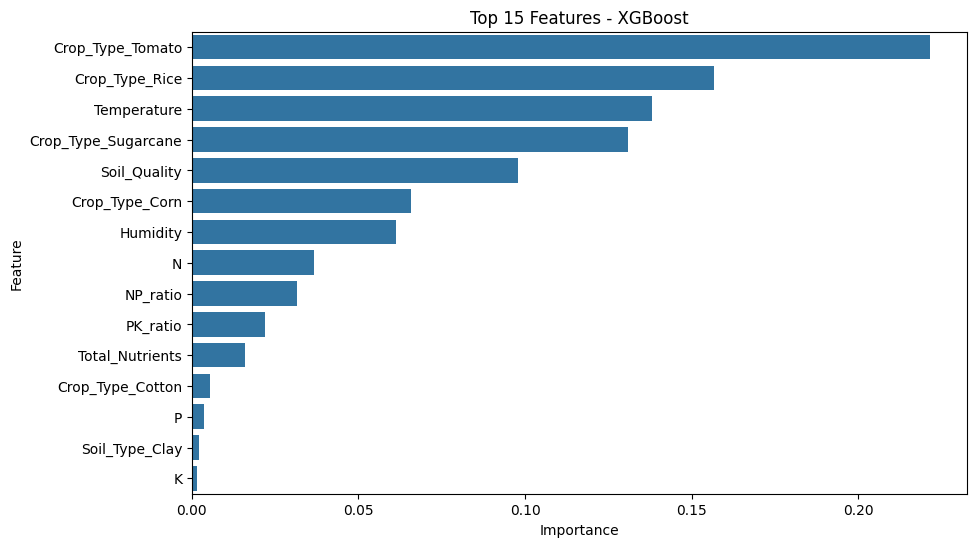


Hyperparameter Tuning...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 200}
Best R²: 0.9766

Final Model Performance:
R² Score: 0.9770
MSE: 15.3485


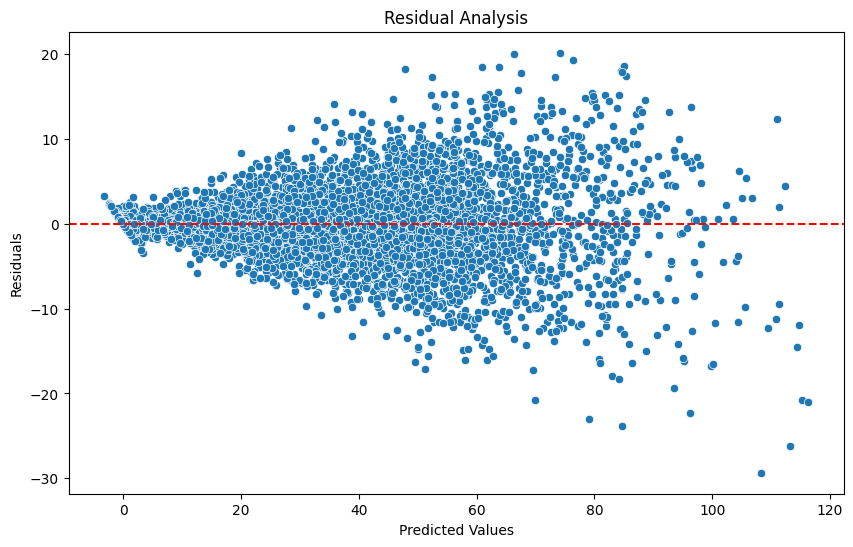

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv("/content/crop_yield_dataset (1).csv")

# Initial Data Exploration
print("Initial Data Exploration:")
print(f"Shape: {df.shape}")
print("\nMissing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

# Drop unnecessary columns
df.drop("Date", axis=1, inplace=True)

# Feature Engineering
print("\nFeature Engineering...")
df['Total_Nutrients'] = df['N'] + df['P'] + df['K']
df['NP_ratio'] = df['N'] / (df['P'] + 1e-5)
df['PK_ratio'] = df['P'] / (df['K'] + 1e-5)
df['Weather_Index'] = df['Temperature'] * df['Humidity'] / (df['Wind_Speed'] + 1)
df['Soil_Index'] = df['Soil_Quality'] * df['Soil_pH']
df['Humidity_log'] = np.log1p(df['Humidity'])

# Visualizations
plt.figure(figsize=(15, 10))
sns.pairplot(df.select_dtypes(include=['float64', 'int64']), diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Prepare data for modeling
X = df.drop('Crop_Yield', axis=1)
y = df['Crop_Yield']

# Identify categorical and numerical features
categorical_features = ['Crop_Type', 'Soil_Type']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Model Pipeline Setup
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    print(f"\nTraining {name}...")
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'R2': r2
    }

    print(f"{name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")

    # Cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f"Cross-validated R²: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

# Feature Importance Analysis (using best model)
print("\nFeature Importance Analysis...")
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', models[best_model_name])
])
best_pipeline.fit(X_train, y_train)

# Get feature names after preprocessing
cat_encoder = best_pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(categorical_features)
all_features = numerical_features + list(cat_features)

# Feature importance
if hasattr(best_pipeline.named_steps['model'], 'feature_importances_'):
    importances = best_pipeline.named_steps['model'].feature_importances_
    feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
    feat_imp = feat_imp.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15))
    plt.title(f'Top 15 Features - {best_model_name}')
    plt.show()

# Hyperparameter Tuning (on best model)
print("\nHyperparameter Tuning...")
if best_model_name == 'RandomForest':
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 6]
    }

grid_search = GridSearchCV(
    best_pipeline,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R²: {grid_search.best_score_:.4f}")

# Final Evaluation
final_model = grid_search.best_estimator_
y_pred_final = final_model.predict(X_test)
final_r2 = r2_score(y_test, y_pred_final)
final_mse = mean_squared_error(y_test, y_pred_final)

print("\nFinal Model Performance:")
print(f"R² Score: {final_r2:.4f}")
print(f"MSE: {final_mse:.4f}")

# Residual Analysis
residuals = y_test - y_pred_final
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_final, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()